# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [68]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display

In [69]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [70]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
# use pd.to_numeric
clean_hospital_read_df.loc[:, 'Number of Discharges'] = pd.to_numeric(clean_hospital_read_df['Number of Discharges'], int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

# clean null values
clean_hospital_read_df = clean_hospital_read_df[
    clean_hospital_read_df['Excess Readmission Ratio'].notnull() &
    clean_hospital_read_df['Number of Readmissions'].notnull() ]

# reset index after cleaning
clean_hospital_read_df.reset_index(inplace=True)

clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].describe()


C:\Users\SMP\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Number of Discharges,Excess Readmission Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


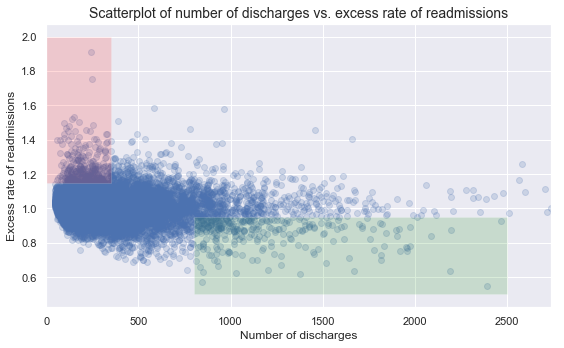

In [71]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [20]:
# Your turn
display(clean_hospital_read_df)

,index,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1,1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
2,1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
3,1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
4,1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
5,1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
6,2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
7,2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
8,2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
9,2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


Num. of Discharges - slope: -2.741271664833512e-05 ,  XS Readmission Ratio - y-intercept: 1.0172104654591696
Correlation Coefficient for Number of Discharges to Excess Readmission Ratio: -0.08910893048399626


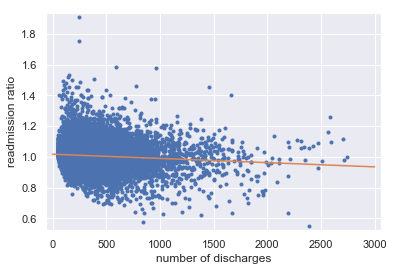

In [72]:
x_discharge = np.array([a for a in clean_hospital_read_df['Number of Discharges'][81:-3]])
y_readmission = np.array(list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3]))

a, b = np.polyfit(x_discharge, y_readmission, 1)

print('Num. of Discharges - slope:', a, ',', ' XS Readmission Ratio - y-intercept:', b)


# create function for Pearson Correlation Coefficient
def pearson_r(x, y):
    """Compute Pearson Correlation Coefficient for Two Arrays"""
    corr_mat = np.corrcoef(x, y)
    
    return corr_mat[0,1]

r = pearson_r(x_discharge, y_readmission)

print('Correlation Coefficient for Number of Discharges to Excess Readmission Ratio:', r)



_ = plt.plot(x_discharge, y_readmission, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of discharges')
_ = plt.ylabel('readmission ratio')
plt.margins(0.02)

x1 = np.array([0, 3000])
y1 = a * x1 + b

_ = plt.plot(x1, y1)

plt.show()

#### Adding the line to the plotted data shows that this correlation is realatively weak.  There are many more data points for smaller size hospitals which makes the scatter plot alone a little misleading.

In [73]:
# hypothesis test pearson correlation coefficient.
# Null Hypothesis: there is no correlation between hospital discharge rate (size)
# and excess readmission rate


perm_replicates = np.empty(1000)

# draw replicates
for i in range(1000):
    # permute x_discharge
    discharge_permuted = np.random.permutation(x_discharge)
    
    # compute pearson correlation
    perm_replicates[i] = pearson_r(discharge_permuted, y_readmission)

# calculate p value
p_pearson = np.sum(perm_replicates <= r) / len(perm_replicates)

print('p-value of pearson correlation coefficient:', p_pearson)


p-value of pearson correlation coefficient: 0.0


In [74]:
# create function to draw bootstrap pairs estimates on linear regression parameters

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices from which to sample: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# generate 500 slope and intercept replicates of slope and intercept
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x_discharge, y_readmission, 2500)


In [66]:
# Calculate and print 95% confidence intervals for slope and y-intercept

slope_99 = np.percentile(bs_slope_reps, [.5, 99.5])
y_int_99 = np.percentile(bs_intercept_reps, [.5, 99.5])

print('99% Confidence Interval for the slope:', slope_99)
print('99% Confidence Interval for the y-intercept:', y_int_99)

# Calculate and print p-values for slope and y-intercept
p_slope = sum(bs_slope_reps < a)/len(bs_slope_reps)
print('slope p-value:', p_slope)

p_intercept = sum(bs_intercept_reps > b)/len(bs_intercept_reps)
print('y-intercept p-value:', p_intercept)


99% Confidence Interval for the slope: [-3.63564830e-05 -1.88324843e-05]
99% Confidence Interval for the y-intercept: [1.01381936 1.02095125]
slope p-value: 0.5052
y-intercept p-value: 0.498


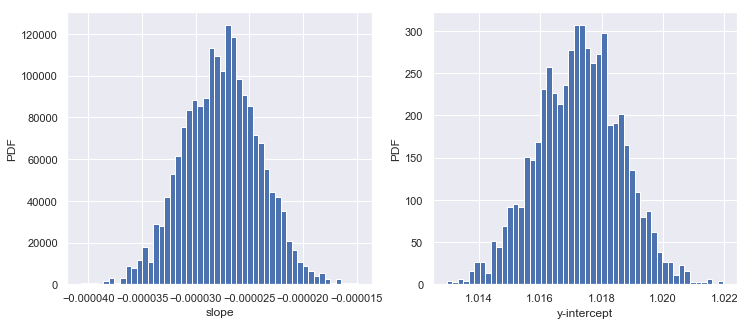

In [75]:
# Plot PDF histograms for slope and y-intercept replicates

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.subplot(1,2,2)
_ = plt.hist(bs_intercept_reps, bins=50, density=True)
_ = plt.xlabel('y-intercept')
_ = plt.ylabel('PDF')
plt.show()


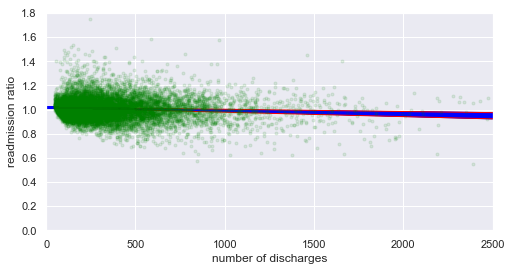

In [76]:
# Plot bootsrap lines

x2 = np.array([0, 2500])

plt.figure(figsize=(8,4))

for i in range(2500):
    _ = plt.plot(x2, bs_slope_reps[i]*x2 + bs_intercept_reps[i],
                linewidth=0.5, color='blue')

_ = plt.xlim(0, 2500)
_ = plt.ylim(0, 1.8)

# Plot confidence interval lines
_ = plt.plot(x_discharge, y_int_99[1] + slope_99[1] * x_discharge, '-', linewidth=1, color='red') 
_ = plt.plot(x_discharge, y_int_99[0] + slope_99[0] * x_discharge, '-', linewidth=1, color='red')

# Plot data
_ = plt.plot(x_discharge, y_readmission, marker='.', linestyle='none', alpha=0.1, color='green')

_ = plt.xlabel('number of discharges')
_ = plt.ylabel('readmission ratio')

plt.show()


**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

##### Given the p-value of the Pearson correlation coefficient based on replication, there is a statistically significant correlation between hospital discharge - as a measure of size -  and excess readmission ratio.  However, this is a realtively weak correlation as shown in the visuals.

+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

##### This "may" be true, but it cannot be examined with this data.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

##### While upgrading resource allocation "wouldn't hurt."  With such a weak correlation it would be damaging to hospital staff morale to threaten closure.

+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

#####  Again, it would be carless to undertake this action based on this data.  Consolidating facilities could increase distance many people would have to travel to obtain care.

